In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pymysql
import h5py
import numpy as np
import spacepy
from spacepy import pycdf

#conn = pymysql.connect(host="localhost",
# user="root", passwd="", db="PICSimulations")


This unreleased version of SpacePy is not supported by the SpacePy team.


In [2]:
def readcdf (num):
    cdf = pycdf.CDF('/Users/gmurphy/Downloads/asimdata00.cdf')
    print(cdf)
    data = cdf['Temp'][...] # don't forget the [...]
    cdf_dat = cdf.copy()
    cdf_dat.keys()
    cdf.close()

In [3]:
f = h5py.File('asimdata01.h5','r')
f.keys()

[u'asimdata']

In [4]:
a=f['/asimdata']

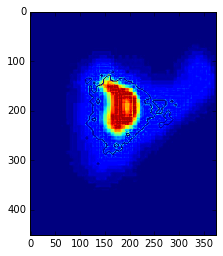

In [6]:
plt.imshow((a[:,:]+0.1))
plt.savefig('nadcam1.png', dpi=100)

In [33]:
import datetime
import os
from skimage.transform import resize

time = [datetime.datetime.today()]
print (time)
import numpy as np
data =  resize(a, (1024, 1024))
fname='asimdat01.cdf'
try:
    os.remove(fname)
except OSError:
    pass
cdf = pycdf.CDF(fname, '')
cdf['Epoch'] = time
cdf['Latitude'] = [55.77]
cdf['Longitude'] = [12.5]
cdf['MMIAdata'] = data
trigeventtype='Lightning'
cdf.attrs['TriggerEventType'] = trigeventtype
cdf.attrs['SuspectedFalseTrigger'] = False
cdf.attrs['Author'] = 'Gareth Murphy <gmurphy@space.dtu.dk>'
cdf.attrs['CreateDate'] = datetime.datetime.now()
cdf['MMIAdata'].attrs['units'] = 'V'

print (cdf)
print (cdf.attrs)

cdf.close()



[datetime.datetime(2016, 3, 16, 11, 35, 31, 978445)]
Epoch: CDF_EPOCH [1]
Latitude: CDF_FLOAT [1]
Longitude: CDF_FLOAT [1]
MMIAdata: CDF_DOUBLE [1024, 1024]
Author: Gareth Murphy <gmurphy@space.dtu.dk> [CDF_CHAR]
CreateDate: 2016-03-16 11:35:32.017000 [CDF_EPOCH]
SuspectedFalseTrigger: 0.0 [CDF_FLOAT]
TriggerEventType: Lightning [CDF_CHAR]
